In [17]:
#Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')


In [18]:
#load dataset
data_main= pd.read_excel('E:\pro\Cars.xlsx')

In [20]:
data_main.head()

,enginesize,carlength,carwidth,carheight,price
0,130,168.8,64.1,48.8,13495
1,130,168.8,64.1,48.8,16500
2,152,171.2,65.5,52.4,16500
3,109,176.6,66.2,54.3,13950
4,136,176.6,66.4,54.3,17450


In [4]:
data_main.shape

(99, 5)

In [5]:
data_main.info

<bound method DataFrame.info of     enginesize  carlength  carwidth  carheight  price
0          130      168.8      64.1       48.8  13495
1          130      168.8      64.1       48.8  16500
2          152      171.2      65.5       52.4  16500
3          109      176.6      66.2       54.3  13950
4          136      176.6      66.4       54.3  17450
5          120      176.6      76.5       55.6  17450
6          121      176.6      76.5       55.6  17450
7          122      176.6      76.5       55.6  17450
8          123      176.6      76.5       55.6  18555
9          124      176.6      76.5       55.6  18555
10         125      177.5      76.5       55.6  18555
11         128      177.5      76.5       56.8  18555
12         110      177.5      76.5       56.8  19897
13         110      177.5      77.8       56.8  19897
14         150      177.5      77.8       56.8  19897
15         152      177.5      77.8       56.8  19897
16         140      177.5      77.8       56.8  19

In [6]:
#checking the missing values
data_main.isnull().sum() 

enginesize    0
carlength     0
carwidth      0
carheight     0
price         0
dtype: int64

In [7]:
#statistical measures about the data`
data_main.describe()

,enginesize,carlength,carwidth,carheight,price
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,148.555556,157.334343,82.125253,63.203030,30965.717172
std,23.886305,29.333543,7.765207,7.110519,16727.613490
min,109.000000,115.400000,64.100000,48.800000,13495.000000
25%,135.500000,130.400000,77.800000,57.900000,19116.500000
50%,145.000000,168.800000,80.300000,60.800000,20000.000000
75%,168.000000,177.500000,88.800000,67.400000,35987.000000
max,190.000000,196.400000,95.300000,77.800000,66786.000000


In [8]:
#checking the distributed of price variable
data_main['price'].value_counts() 

20000    13
25876    12
66786     7
56789     7
33786     7
15688     7
47342     6
35987     6
19678     6
16895     6
19897     6
18555     4
17450     4
60123     4
16500     2
13950     1
13495     1
Name: price, dtype: int64

In [9]:
#splitting the features and price
x = data_main.drop(columns='price', axis=1)
y = data_main['price']
print(x) 

    enginesize  carlength  carwidth  carheight
0          130      168.8      64.1       48.8
1          130      168.8      64.1       48.8
2          152      171.2      65.5       52.4
3          109      176.6      66.2       54.3
4          136      176.6      66.4       54.3
5          120      176.6      76.5       55.6
6          121      176.6      76.5       55.6
7          122      176.6      76.5       55.6
8          123      176.6      76.5       55.6
9          124      176.6      76.5       55.6
10         125      177.5      76.5       55.6
11         128      177.5      76.5       56.8
12         110      177.5      76.5       56.8
13         110      177.5      77.8       56.8
14         150      177.5      77.8       56.8
15         152      177.5      77.8       56.8
16         140      177.5      77.8       56.8
17         133      177.5      77.8       56.8
18         134      188.7      77.8       56.8
19         166      188.7      77.8       57.9
20         16

In [10]:
print(y) 

0     13495
1     16500
2     16500
3     13950
4     17450
5     17450
6     17450
7     17450
8     18555
9     18555
10    18555
11    18555
12    19897
13    19897
14    19897
15    19897
16    19897
17    19897
18    15688
19    15688
20    15688
21    15688
22    15688
23    15688
24    15688
25    16895
26    16895
27    16895
28    16895
29    16895
30    16895
31    19678
32    19678
33    19678
34    19678
35    19678
36    19678
37    20000
38    20000
39    20000
40    20000
41    20000
42    20000
43    20000
44    20000
45    20000
46    20000
47    20000
48    20000
49    20000
50    25876
51    25876
52    25876
53    25876
54    25876
55    25876
56    25876
57    25876
58    25876
59    25876
60    25876
61    25876
62    35987
63    35987
64    35987
65    35987
66    35987
67    35987
68    33786
69    33786
70    33786
71    33786
72    33786
73    33786
74    33786
75    47342
76    47342
77    47342
78    47342
79    47342
80    47342
81    56789
82    56789
83  

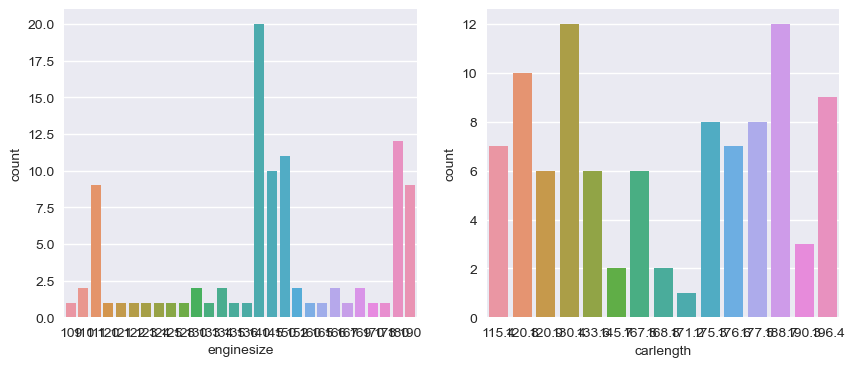

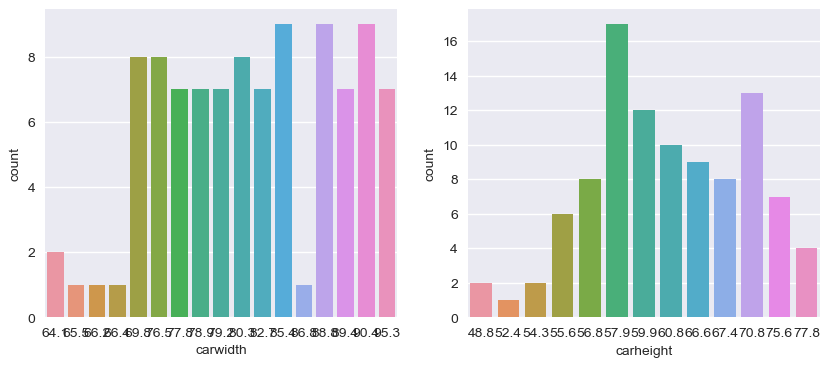

In [11]:
cat_cols = ['enginesize','carlength','carwidth','carheight']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=data_main)
    i +=1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=data_main)
    i +=1
    plt.show()
    

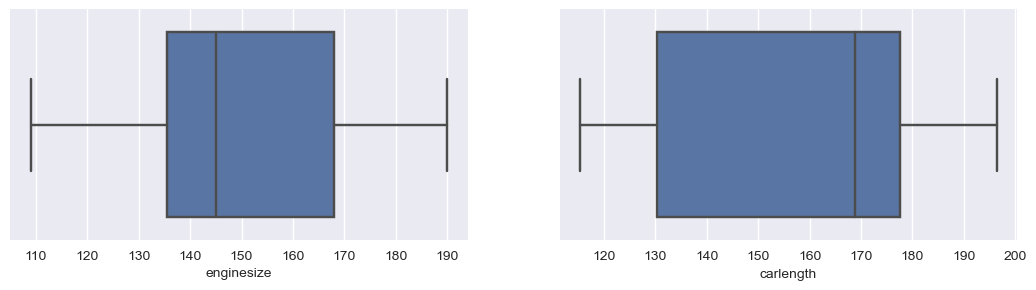

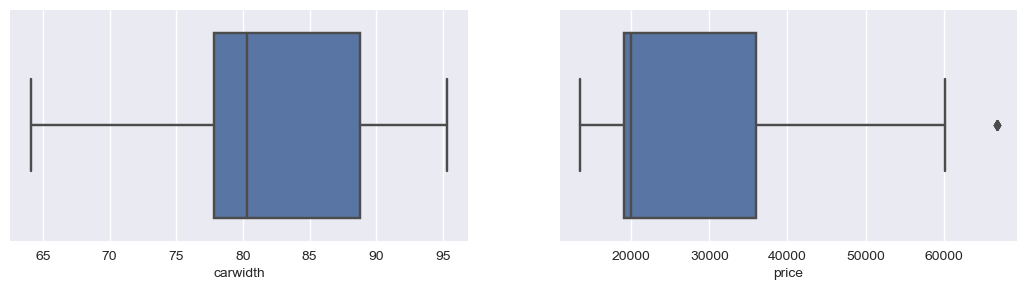

In [12]:
num_cols = ['enginesize','carlength','carwidth','price']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data_main)
    i +=1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data_main)
    i +=1
    plt.show()
    

In [13]:
data_main[data_main['price'] > data_main['price'].quantile(0.93)]

,enginesize,carlength,carwidth,carheight,price
92,170,196.4,69.8,75.6,66786
93,180,196.4,69.8,75.6,66786
94,134,196.4,69.8,75.6,66786
95,135,196.4,69.8,77.8,66786
96,178,196.4,69.8,77.8,66786
97,169,145.7,69.8,77.8,66786
98,169,145.7,69.8,77.8,66786


In [14]:
data_main[data_main['enginesize'] > data_main['enginesize'].quantile(0.91)]

,enginesize,carlength,carwidth,carheight,price
59,190,115.4,88.8,66.6,25876
60,190,120.9,88.8,66.6,25876
61,190,120.9,88.8,66.6,25876
62,190,120.9,88.8,66.6,35987
63,190,120.9,88.8,66.6,35987
64,190,120.9,88.8,66.6,35987
65,190,120.9,88.8,66.6,35987
66,190,130.4,88.8,66.6,35987
67,190,130.4,88.8,67.4,35987


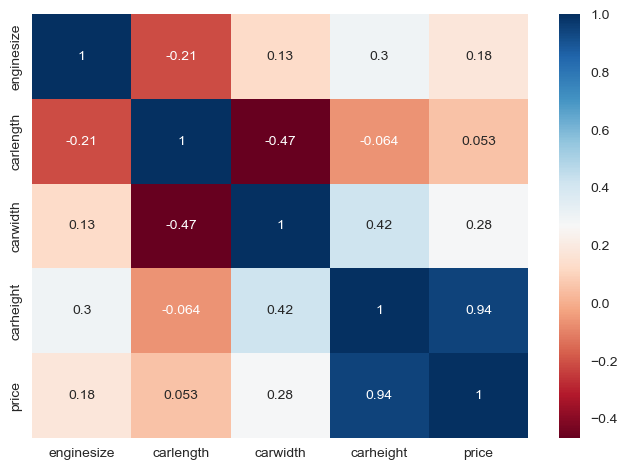

In [15]:
#bivarite/multi-variate analysis
sns.heatmap(data_main.corr(), annot=True, cmap="RdBu")
plt.show()

In [16]:
data_main.corr()['price']

enginesize    0.176891
carlength     0.052969
carwidth      0.277050
carheight     0.944604
price         1.000000
Name: price, dtype: float64

In [22]:
data_main.pivot_table(values='price', index='enginesize',columns='carheight')

carheight,48.8,52.4,54.3,55.6,56.8,57.9,59.9,60.8,66.6,67.4,70.8,75.6,77.8
enginesize,,,,,,,,,,,,,
109,NaN,NaN,13950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,19897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25876.0,25876.000,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,17450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,17450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,17450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,18555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,18555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,18555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data_main.pivot_table(values='price', index='enginesize',columns='carwidth')

carwidth,64.1,65.5,66.2,66.4,69.8,76.5,77.8,78.9,79.2,80.3,82.7,85.4,86.8,88.8,89.4,90.4,95.3
enginesize,,,,,,,,,,,,,,,,,
109,NaN,NaN,13950.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,19897.0,19897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25876.0,25876.0,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,17450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,17450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,NaN,NaN,NaN,NaN,NaN,17450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,18555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,18555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,18555.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data_main.drop(labels='carwidth',axis=1, inplace = True)

In [28]:
data_main.head()

,enginesize,carlength,carheight,price
0,130,168.8,48.8,13495
1,130,168.8,48.8,16500
2,152,171.2,52.4,16500
3,109,176.6,54.3,13950
4,136,176.6,54.3,17450


In [35]:
#seperating target variable and its features
y = data_main['price']
x = data_main.drop('price',axis=1)

In [36]:
#splitting the data into data test & data train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.4, random_state = 42)

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


x train:  (79, 3)
x test:  (8, 3)
y train:  (79,)
y test:  (8,)


In [40]:
# model creation evaluation
# linear regression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [44]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    #training model
    model.fit(x_train,y_train)
    
    #R2 score of train set
    y_pred_train = model.predict(x_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
     #R2 score of train set
    y_pred_test = model.predict(x_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
                   
     # R2 mean of train set using cross validatin
    cross_val = cross_val_score(model ,x_train ,y_train , cv=5 )
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    #printing results
    print("Train R2-score: ", round(R2_train_model,2))
    print("Test R2-score: ", round(R2_test_model,2))
    print("Train CV score: ", cross_val)
    print("Train CV mean: ", round(cv_mean,2))
                   
    #plotting Graphs
    #Residual plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # y_test  vs  y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y= y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
                   
    plt.show()
                   

Train R2-score:  0.91
Test R2-score:  0.95
Train CV score:  [0.89008164 0.9260122  0.8557138  0.93266952 0.75807153]
Train CV mean:  0.87


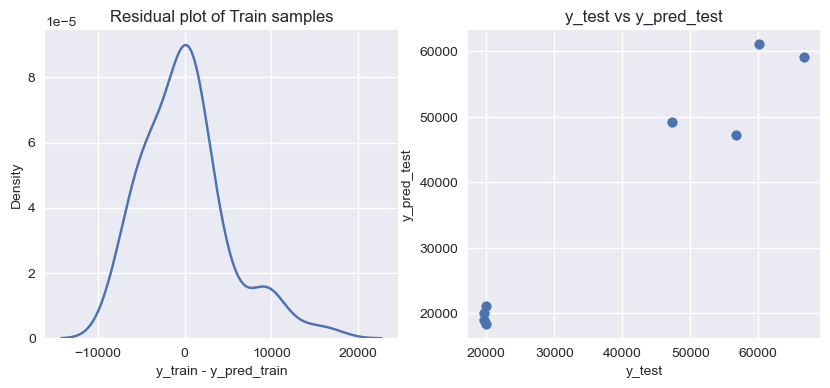

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pk1")

In [48]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()
#rate at each correctingg is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
#number of trees in gradient boosting 
n_estimators=list(range(500,1000,100))
#maximum number of levels in a tree
max_depth=list(range(4,9,4))
#minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
#minimum number of samples required to be at a leaf node
min_samples_leaf=[1,2,5,7]
#number of features to be considered at each split
max_features=['auto','sqrt']

#hyperparameters dict
param_grid = {"learning_rate":learning_rate,
             "n_estimators":n_estimators,
            "max_depth":max_depth,
             "min_samples_split":min_samples_split,
             "min_samples_leaf":min_samples_leaf,
             "max_features":max_features}
gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

Train R2-score:  0.99
Test R2-score:  0.99
Train CV score:  [0.98307736 0.99517648 0.9088012  0.98358293 0.79234892]
Train CV mean:  0.93


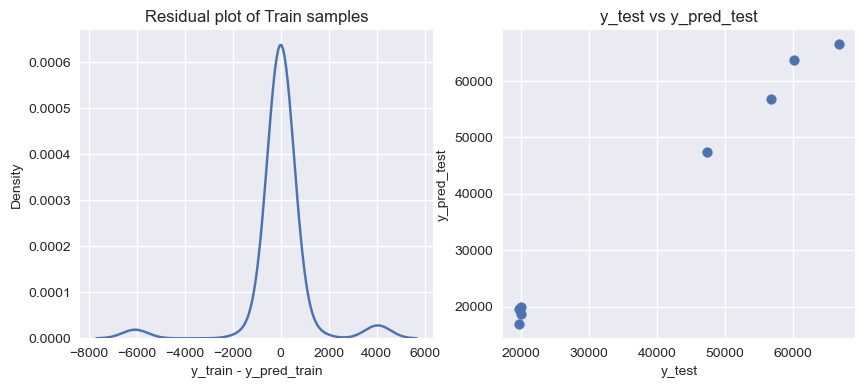

In [49]:
car_pred_model(gb_rs,"gradient_boosting.pk1")

In [50]:
Technique = ["LinearRegression","GradientBoosting"]
results=pd.DataFrame({'Model':Technique,'R Squared(Train)': R2_train,'R Squered(Test)': R2_test,'Cv score mean(Train)':CV})
display(results)

,Model,R Squared(Train),R Squered(Test),Cv score mean(Train)
0,LinearRegression,0.91,0.95,0.87
1,GradientBoosting,0.99,0.99,0.93
